In [4]:
import warnings
import itertools
from math import sqrt
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
pd.set_option("Display.max_columns",None)

In [115]:
#['Aksaray', 'Alibeyköy', 'Arnavutköy', 'Avcılar', 'Bağcılar', 'Beşiktaş', 'Beylikdüzü', 'Büyükada', 'Çatladıkapı', 'Esenler', 'Göztepe', 'Kadıköy', 'Kandilli1', 'Kartal', 'Kağıthane1', 'Kumköy', 'Maslak', 'Mobil', 'Sancaktepe', 'Sarıyer', 'Selimiye', 'Sultangazi1', 'Sultangazi2', 'Sultangazi3', 'Tuzla', 'Ümraniye1', 'Üsküdar1', 'Yenibosna']


In [5]:
# "dataset_combined" klasörüne git
folder_path = "/Users/eyupburakatahanli/Desktop/Tubitak_Air_pol/dataset_combined"
os.chdir(folder_path)
dfs = {}
# tüm CSV dosyalarını al ve oku
for filename in os.listdir():
    if filename.endswith(".csv"):
        # dosya adından DataFrame adını ve dosya adını çıkart
        df_name = filename.split(".")[0].replace(" ", "")
        df = pd.read_csv(filename)
        exec(df_name + " = pd.DataFrame(df)") # DataFrame'i kaydet
        dfs[df_name] = df



/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/2805332446.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/2805332446.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/2805332446.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/2805332446.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/2805332446.py:10: DtypeWarning: Columns (14,15,16) have mix

dict_keys(['Arnavutköy', 'Beşiktaş', 'Kartal', 'Bağcılar', 'Göztepe', 'Sancaktepe', 'Tuzla', 'Sultangazi3', 'Sultangazi2', 'Sultangazi1', 'Üsküdar1', 'Yenibosna', 'Mobil', 'Sarıyer', 'Ümraniye1', 'Esenler', 'Çatladıkapı', 'Büyükada', 'Kandilli1', 'Kumköy', 'Maslak', 'Aksaray', 'Alibeyköy', 'Avcılar', 'Kadıköy', 'Kağıthane1', 'Selimiye', 'Beylikdüzü'])


/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/2805332446.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/2805332446.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [8]:
seasons = {
    1: "Winter",
    2: "Winter",
    3: "Spring",
    4: "Spring",
    5: "Spring",
    6: "Summer",
    7: "Summer",
    8: "Summer",
    9: "Autumn",
    10: "Autumn",
    11: "Autumn",
    12: "Winter"
}

In [9]:
def categorize_hour(hour):
    if hour < 8:
        return 'Night'
    elif hour < 16:
        return 'Day'
    else:
        return 'Evening'

In [10]:
for district, df in dfs.items():
    #format dönüşümü
    dfs[district]['ReadTime'] = pd.to_datetime(dfs[district]['ReadTime'], format='%Y-%m-%dT%H:%M:%S')
    #gün ay yıl- olarak ayı değişkenlere atanması
    dfs[district]["Year"] = dfs[district]["ReadTime"].dt.year
    dfs[district]["Day"] = dfs[district]["ReadTime"].dt.day
    dfs[district]["Month"] = dfs[district]["ReadTime"].dt.month
    #saat değişkeni ve buna uygun kategorinin eklenmesi
    dfs[district]["Hour"] = dfs[district]["ReadTime"].dt.hour
    dfs[district]['HourCategory'] = dfs[district]['Hour'].apply(categorize_hour)
    #Mevsim değişkeni ve kategorisinin eklenmesi
    dfs[district]['Season'] = dfs[district]['ReadTime'].dt.month.map(seasons)

    #aqı endex değeri nan olan tüm değişkenleri siliyoruz
    dfs[district] = dfs[district].dropna(subset=['AQIINDEX_AQI'])

    #sonraki çalışmalarda 2023 yılına ait bir değişken olduğunu farkettik bunu siliyoruz
    dfs[district].drop(dfs[district][dfs[district]['Year'] == 2023].index,inplace=True)

/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/4198393816.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[district].drop(dfs[district][dfs[district]['Year'] == 2023].index,inplace=True)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/4198393816.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[district].drop(dfs[district][dfs[district]['Year'] == 2023].index,inplace=True)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/4198393816.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

In [35]:
def günici_hesap(df,zaman):
    """
    bu fonksiyon veri çerçevelerine eklenen gün içi zaman dilimlerine göre filtreleme yapıp ortalama çıkarmaya yarar
    """
    filtreli_veri = df[df['HourCategory'] == zaman]
    filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()
    return filtreli_ortalama 

In [195]:
def plot_günici_hesap(df,name):
    filtreli_veri = df[df['HourCategory'] == "Day"]
    df_day_mean = filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()
    
    filtreli_veri = df[df['HourCategory'] == "Evening"]
    df_evening_mean = filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()
    
    filtreli_veri = df[df['HourCategory'] == "Night"]
    df_night_mean = filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()
    
    bar_width = 0.3
    kategoriler = ["Gündüz 08:00-16:00","Akşam 16:00-00:00","Gece 00:00-08:00"]
    #renkler = ['blue', 'green', 'orange'] 
    renkler = ['#FF8C00', '#8B008B', '#008080']
    plt.figure(figsize=(5, 5))

    bars = plt.bar(kategoriler, [df_day_mean, df_evening_mean, df_night_mean], width=bar_width,color=renkler)
    
    plt.xlabel('Zaman dilimleri')
    plt.ylabel('AQI INDEX Değerleri')
    plt.title( str(name)+' Gün İçi AQI INDEX Değişim Grafiği')
    
    for i, bar in enumerate(bars):
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

    plt.show()

def plot_mevsim_hesap(df,name):
    filtreli_veri = df[df['Season'] == "Winter"]
    df_winter_mean = filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()
    
    filtreli_veri = df[df['Season'] == "Summer"]
    df_summer_mean = filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()
    
    filtreli_veri = df[df['Season'] == "Autumn"]
    df_autumn_mean = filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()
    
    filtreli_veri = df[df['Season'] == "Spring"]
    df_spring_mean = filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()
    
    bar_width = 0.5
    kategoriler = ["Kış","İlkbahar","Yaz","Sonbahar"]
    renkler = ['#FFC107', '#03A9F4', '#4CAF50', '#FF5722']
    plt.figure(figsize=(5, 5))

    bars = plt.bar(kategoriler, [df_winter_mean, df_spring_mean, df_summer_mean,df_autumn_mean], width=bar_width,color=renkler)

    plt.xlabel('Zaman dilimleri')
    plt.ylabel('AQI INDEX Değerleri')
    plt.title( str(name)+' Mevsimlere Ortalama AQI INDEX Değişim Grafiği')
    
    for i, bar in enumerate(bars):
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')

    plt.show()

## Aksaray


Aksaray, İstanbul'un Avrupa Yakası'nda yer alan ve şehrin güneydoğu kısmında bulunan bir Semttir. Fatih ilçesinde bulunmaktadır. Şehiriçi ulaşımda ana bir aktarma noktası olarak bilinir. Mahalle olarak 10 binin altında nüfus kaydı olmasına rağmen bulunduğu konum ve ulaşım olanakları sebebiyle oldukça yoğun bir semttir. 2001 yılında hava kalitesi ölçüm istasyonları faaliyet göstermeye başlamıştır. Bu konuda İstanbul’ da ilk hava verisi tutulan semtlerden birisidir. Araştırma kapsamında 2010-2022 verileri analiz edilmiş olup gün içinde değişim [tablo] gösterilmiştir.


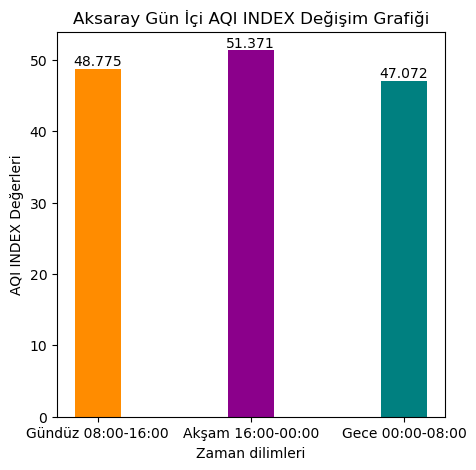

In [196]:
plot_günici_hesap(df,'Aksaray')

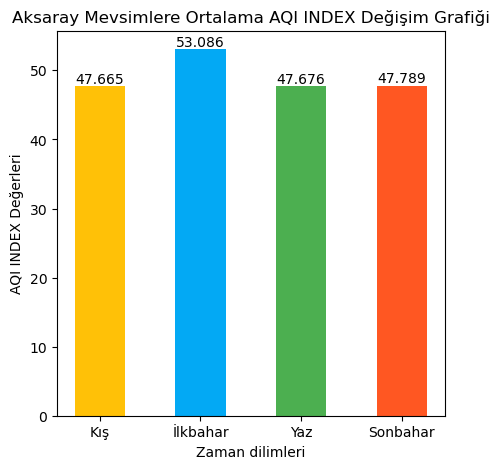

In [197]:
plot_mevsim_hesap(df,'Aksaray')

Aynı zamanda mevsimlere göre kırılımda ortalama AQI index değerleri [tablo] üzerinde gösterilmiştir. ilk bakışta ilkbahar aylarında yükseliş göze çarpmaktadır. (Bunu ilgili aylarda yaşanan yoğunluktan kaynaklandığı düşünülebilir)

## Alibeyköy

Alibeyköy, İstanbul'un Eyüp ilçesine bağlı bir semttir. Şehrin Avrupa Yakası'nda yer alan Alibeyköy, tarihi ve kültürel açıdan zengin bir geçmişe sahiptir. Coğrafi olarak, ilçe Eyüp Sultan'ın sırtlarında yer almaktadır ve Haliç'e doğru bir eğimle inşa edilmiştir. Yüksek araç trafiği ve yerleşim alanlarının yoğunluğu hava kalitesini olumsuz etkileyebilmektedir. Bununla birlikte, son yıllarda çevre bilincinin artmasıyla birlikte Alibeyköy'de hava kalitesi üzerindeki etkileri azaltmak adına çeşitli önlemler alınmaktadır. Yeşil alanların korunması, enerji verimliliği projeleri ve hava kirliliği azaltma çalışmaları gibi adımlar, Alibeyköy'ün hava kalitesini iyileştirmeye yönelik çabaların bir parçasıdır. Bu semtte de 2010 öncesine kadar hava kirliliği verileri düzenli olarak ölçülüp kaydedilmektedir. güniçi ortalama Aqı_index değerleri [tablo]


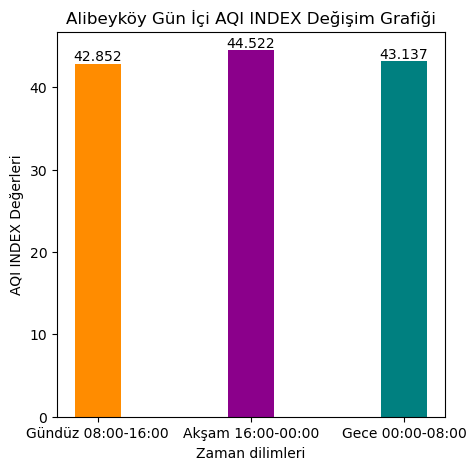

In [200]:
plot_günici_hesap(dfs["Alibeyköy"],'Alibeyköy')

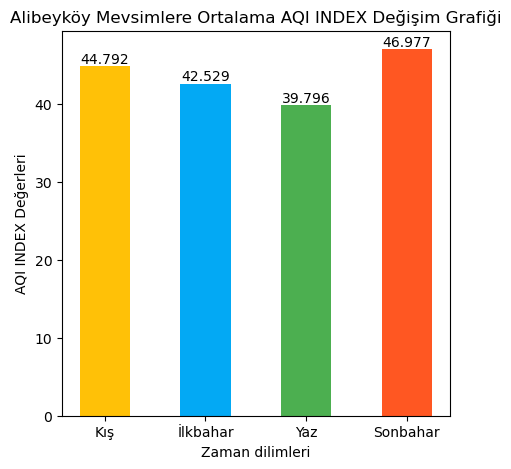

In [201]:
plot_mevsim_hesap(dfs["Alibeyköy"],'Alibeyköy')

mevsimlere göre ortalama AQI index değeleri [tablo]. Bu semtte de sonbahar ve kış aylarında ortalamadan yüksek aqı değerleri görüyoruz. (semtteki yoğun nüfusun ve bu  aylarda ısınma dolayısıyla ortaya çıkan enerji ihtiyacından kaynaklanan bir yükseliş olarak yorumlanabilir. ) hava kirliliğini en aza indirmek için doğalgaz gibi yakıtlar tercih edilebilir. 

## Arnavutköy

Arnavutköy, İstanbul'un Avrupa Yakası'nda yer alan ve şehrin kuzeybatı kısmında bulunan bir ilçedir. Toplam yüzölçümü 450 kilometrekare olan Arnavutköy, İstanbul'un en geniş ilçelerinden biridir. Coğrafi olarak, ilçe Karadeniz'e kıyısı olan bir konumda yer almaktadır. Geniş yüzölçümü geniş ve nüfus yoğunluğunun nispeten az olduğu bir ilçedir. Yeşil alanlar bakımından zengin bir coğrafya olması sebebiyle hava kirliliği verileri daha iyidir. [tablo] da göründüğü üzere burada da gün içi AQI index değerleri fazla değişiklik göstermemektedir.

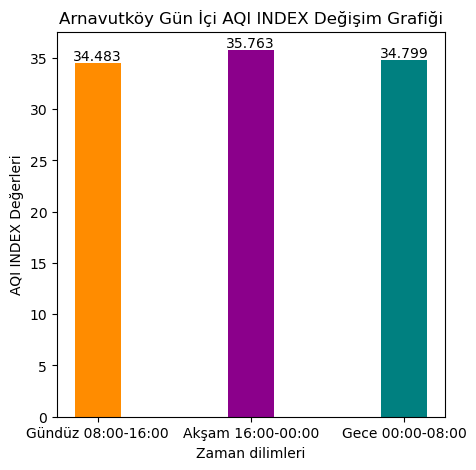

In [205]:
plot_günici_hesap(dfs["Arnavutköy"],'Arnavutköy')

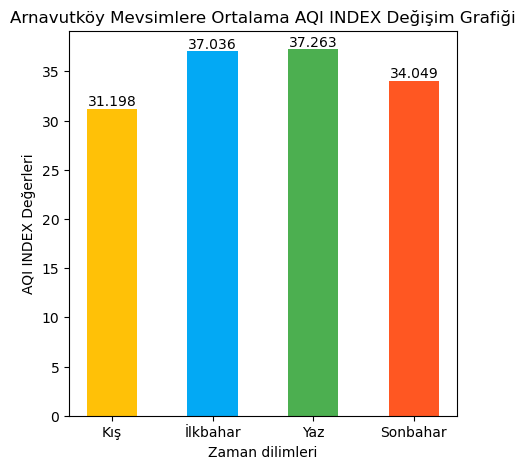

In [206]:
plot_mevsim_hesap(dfs["Arnavutköy"],'Arnavutköy')

[tablo] ya göre kış ayları en düşük ortalamayla hava kirliliğinin hissedildiği aylardır. ilkbahar-yaz aylarıyla artan endüstriyel faaliyetler ve şehrin önemli uluslarası ulaşım noktalarından olan İstanbul havalimanında artan trafiğin etkisiyle hava kirliliğinin de arttığını söyleyebiliriz.

## Avcılar

Avcılar, İstanbul'un Avrupa Yakası'nda yer alan ve şehrin batı kısmında bulunan bir ilçedir. Toplam yüzölçümü 42,01 kilometrekare olan Avcılar, İstanbul'un göl ve deniz manzaralarına sahip ilçelerinden biridir.Coğrafi olarak, ilçe Marmara Denizi'ne kıyısı olan bir konumda yer almaktadır. Marmara denizinde ve Küçükcekmece gölünde uzanan uzun sınır şeridi ve etrafında yoğun yapılaşma olmaması hava kirliliği azaltan etmenlerdendir. [harita görseli]

[tablo] ya göre gün içinde ortalam Aqı değerleri birbirne oldukça yakındır. 

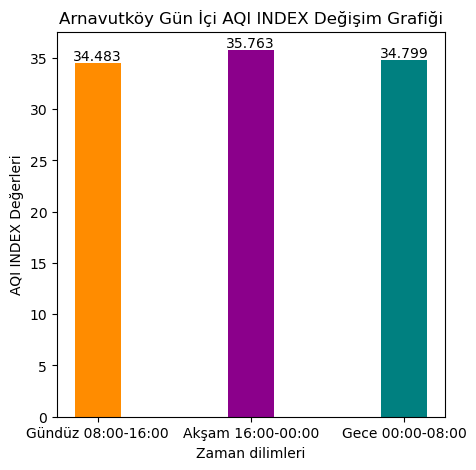

In [207]:
plot_günici_hesap(dfs["Arnavutköy"],'Arnavutköy')

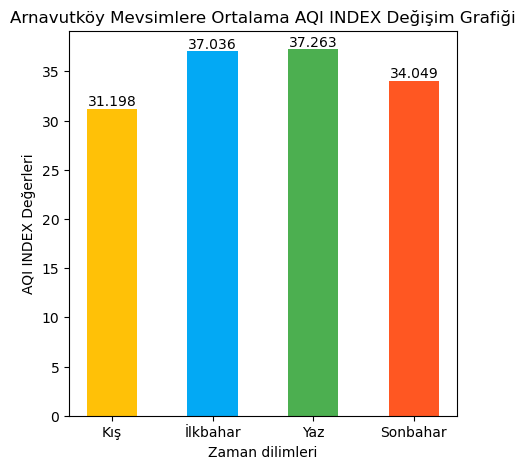

In [208]:
plot_mevsim_hesap(dfs["Arnavutköy"],'Arnavutköy')

bu ilçe de ilkbahar yaz aylarında hava kirliliğinin artış eğiliminde olduğu ilçelerden. 

## Bağcılar

Bağcılar, İstanbul'un Avrupa Yakası'nda yer alan ve şehrin batı kısmında bulunan bir ilçedir. Toplam yüzölçümü 22,89 kilometrekare olan Bağcılar, İstanbul'un en yoğun nüfuslu ilçelerinden biridir. Coğrafi olarak, ilçe E-5 Karayolu üzerinde konumlanmış olup, şehir merkezine yakın bir konumdadır. Genel olarak yerel halkın yaşadığı bir konut bölgesi olarak tanınır. 

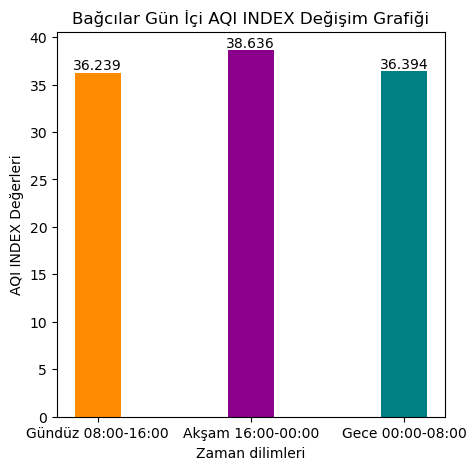

In [209]:
plot_günici_hesap(dfs["Bağcılar"],'Bağcılar')

[tablo]genellikle akşam saatlerinde ortalamanın bir miktar üzerinde kirlilikle karlıştığı görülmektedir. buna yoğun trafiğin sebep olduğu düşünülebilir.

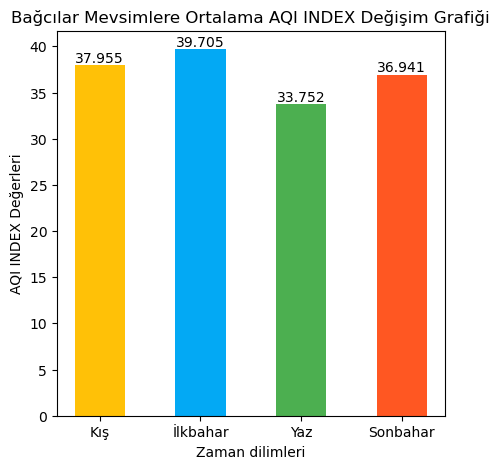

In [210]:
plot_mevsim_hesap(dfs["Bağcılar"],'Bağcılar')

[tablo]Turistik bir merkez olmamasından dolayı yaz ayları en düşük kirlilikle karşılaşılan aylardır.  diğer aylarda artan fosil yakıt tüketimi ise hava kirliliğini olumsuz etkilemektedir. 

## Beşiktaş

Beşiktaş, İstanbul'un Avrupa Yakası'nda yer alan ve şehrin merkezi konumunda bulunan bir ilçedir. Toplam yüzölçümü 18,3 kilometrekare olan Beşiktaş, İstanbul'un en önemli ve prestijli ilçelerinden biridir. Coğrafi olarak, ilçe Boğaziçi'nin kıyısında yer alır ve muhteşem Boğaziçi manzarasıyla ünlüdür. Bu nedenle İstanbul'un turistik açıdan en popüler ilçelerinden biridir. İlçede yer alan Beşiktaş Sahili, gezginlere güzel bir deniz manzarası sunar ve yürüyüş alanları, kafeler ve restoranlarla doludur. Ayrıca ilçenin merkezi konumu, turistlere diğer turistik bölgelere kolay ulaşım imkanı sağlar. Burada da ölçüm istasyonları uzun yıllardır faaliyet göstermektedir. [yıllara göre grafik] buna göre zamanla alınan önlemlerin netice verdiği söylenebilir. şüphesiz bu iyileşmede artan .... yakıt kullanımı da etkili olmuştur

[tablo] gün içinde ve özellikle akşam saatlerinde artan kirliliğin sebebi büyük oranda trafik yoğunluğundan kaynaklanmaktadır 

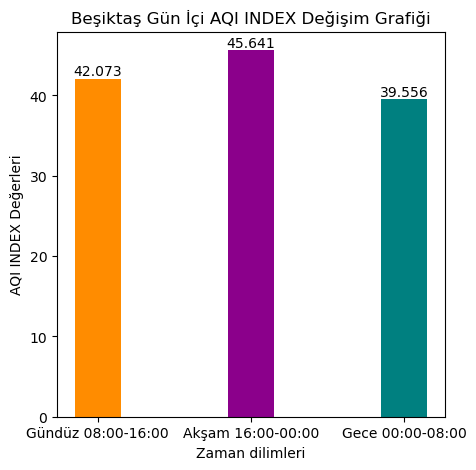

In [211]:
plot_günici_hesap(dfs["Beşiktaş"],'Beşiktaş')

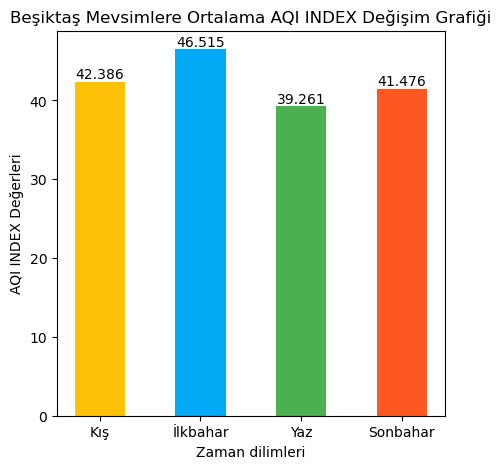

In [212]:
plot_mevsim_hesap(dfs["Beşiktaş"],'Beşiktaş')

[tablo] aqı indexi yazın düşük düzeyde seyretse de ilkbahardaki ortalama artış özellikle turistik faaliyetlerin artışlarından kaynaklanmaktadır. 

## Beylikdüzü

Beylikdüzü, İstanbul'un Avrupa Yakası'nda yer alan ve şehrin batı kısmında bulunan bir ilçedir. Toplam yüzölçümü 37,78 kilometrekare olan Beylikdüzü, İstanbul'un modern ve gelişmiş ilçelerinden biridir.  Ancak ölçüm istasyonları 2022 temmuz ayında faaliyete geçmesi sebebiyle geçmiş yıllara yönelik geniş bir analiz yapılamamaktadır. 

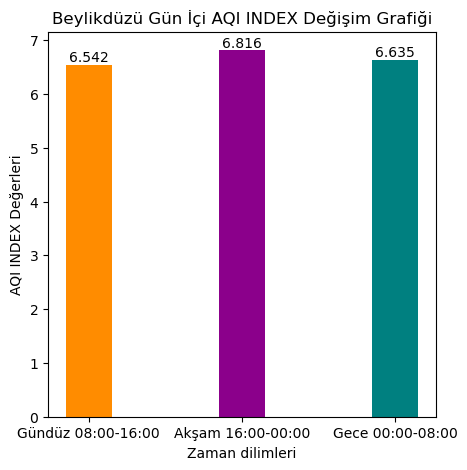

In [213]:
plot_günici_hesap(dfs["Beylikdüzü"],'Beylikdüzü')

Geniş yüzölçümüyle metrekare başına düşen şnsan sayısı oldukça düşüktür. bu sepeple kısa zamanda ölçülen verilen hava kirliliği verileinirn en düşün olduğu ilçe olduğunu göstermektedir.ölçülen tarihlerde ise gün içinde fazla değişkenlik göstermeuyen ortalama aqı index değerini görmekteyiz

In [216]:
#plot_mevsim_hesap(dfs["Beylikdüzü"],'Beylikdüzü') mevsim değişkenlerini kullanmıyoruz çünkü yeteri kadar veri yok

## Büyükada

Büyükada, İstanbul'un en popüler adalarından biridir ve Marmara Denizi'nde yer alır. Büyükada, İstanbul'un Anadolu Yakası'na bağlı olan ve İstanbul Boğazı'ndan uzakta bulunan bir adadır. Adanın toplam yüzölçümü yaklaşık 5,4 kilometrekaredir ve nüfusu oldukça sınırlıdır.

Büyükada, doğal güzellikleri ve tarihi atmosferiyle ünlüdür.ar. Ayrıca adanın doğal alanları ve ormanlık bölgeleri, oksijen bakımından zengin bir ortam oluşturur. Büyükada'nın araç trafiğine kapalı olması ve bisiklet veya fayton gibi alternatif ulaşım araçlarının kullanılması, adanın temiz bir atmosfer sunmasını sağlar.Büyükadada 2012 yılından beri yapılan ölçümler diğer adalar ilgili de fikir vermektedir. 

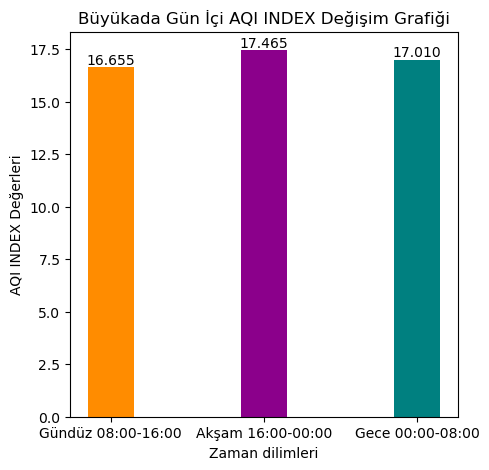

In [217]:
plot_günici_hesap(dfs["Büyükada"],'Büyükada')

[grafik] sınırlı nüfus ve taşıt trafiğine kapalı olması sebebiyle gün içinde aqı değerinin fazla dalgalanmadığını görmekteyiz. grafik bize İstanbul için oldukça iyi ortalama aqı değerlere sahip olduğunu göstermektedir 


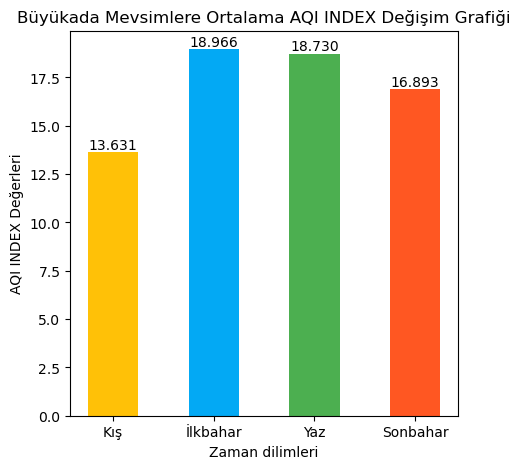

In [218]:
plot_mevsim_hesap(dfs["Büyükada"],'Büyükada')

## Çatladıkapı

Çatladıkapı, İstanbul'un tarihi yarımadasında bulunan ve şehrin en eski semtlerinden biridir. Bu semt, Fatih ilçesine bağlıdır ve İstanbul'un tarihî ve kültürel zenginliklerini bünyesinde barındırır. 2015 yılından itibaren hava kalitesi ölçüm istasyonları veri kaydetmeye devam etmektedir. Eski bir yerleşim yeri içinde bulunması sebebiyle nüfusun yoğun olduğu bir bölgedir. Ayrıca Topkapı Sarayı ve Sultanahmet Camii gibi önemli tarihi ve turistik mekanlara yakınlığı sebebiyle dönemsel yoğunluk yaşanabilmektedir. 

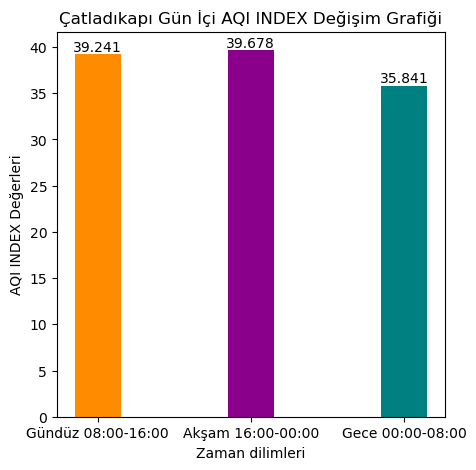

In [219]:
plot_günici_hesap(dfs["Çatladıkapı"],'Çatladıkapı')

[grafik] gündüz ve akşam saatlerinde ortalama düzeyde seyreden ortalama AQI_index değerleri gece saatlerinde %10 kadar düşebilmektedir. 

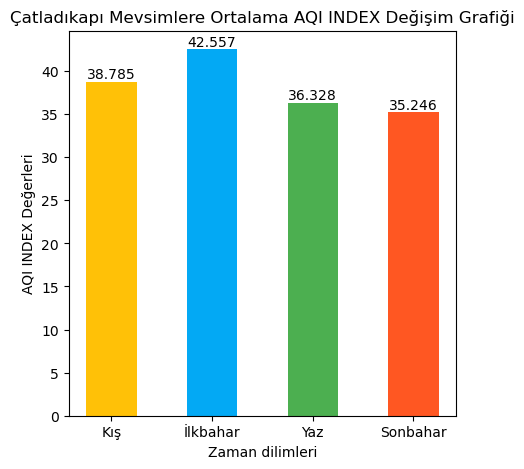

In [220]:
plot_mevsim_hesap(dfs["Çatladıkapı"],'Çatladıkapı')

[grafik] özellikle ilkbaharda ortalamanın üzerinde seyreden bir AQI_index değeri görmekteyiz

## Esenler

Esenler, İstanbul'un Avrupa Yakası'nda bulunan bir ilçedir. Şehrin merkezi bölgelerinden biri olan Esenler, büyük bir nüfusa ev sahipliği yapar. Toplam yüzölçümü 18,5 kilometrekaredir ve İstanbul'un en yoğun yerleşim bölgelerinden biridir. ayrıca  Esenler İstanbul'un ticaret ve sanayi merkezlerinden biridir. İlçede birçok sanayi ve iş merkezi bulunur. Endüstriyel bölgeler, fabrikalar ve iş yerlerine ev sahipliği yapan ilçede maalesef ortalamanın üzerinde aqı index değerleri görülmektedir. [yıllara göre]
grafik incelendiğinde 2013 de oldukça yükselen hava kirliliği alınan önlemlerle yıllar içinde bir miktar azalmıştır

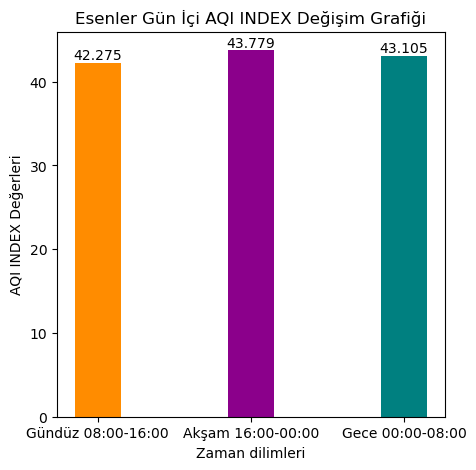

In [223]:
plot_günici_hesap(dfs["Esenler"],'Esenler')

yorum yok

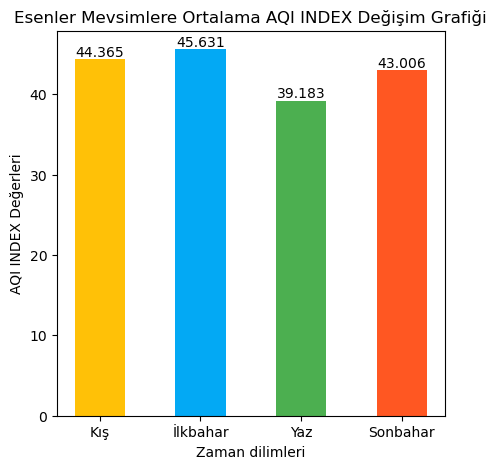

In [222]:
plot_mevsim_hesap(dfs["Esenler"],'Esenler')

ilçede yoğun nüfusun ısınma ihtiyaçları sebebiyle kış aylarında artan kirlilik göze çarpmaktadır. sanayi tesislerinde ve konaklarda kullanılan yakıtların .... ile değiştirlmesi sonucu kirlliğin azalması beklenebilir. İstanbul geneline baktığımızda 4 mevsim içinde yüksek seyreden hava kirliliğini görüyoruz. 

## Göztepe- kadıköy


? göztepeyi ayrı değerlendirmek gerekli midir ? 

Kadıköy, İstanbul'un Anadolu Yakası'nda bulunan bir ilçedir. Şehrin en hareketli ve popüler semtlerinden biri olan Kadıköy, tarihi, kültürel ve sosyal açıdan zengin bir bölgedir. Hem yerli halkın hem de turistlerin ilgisini çeken birçok özelliği vardır. Sanayi açısından diğer ilçelere göre daha az gelişmiş olması sebebiyle oluşan hava kirliliği büyük oranda yoğun insan nüfusundan kaynaklanmaktadır.

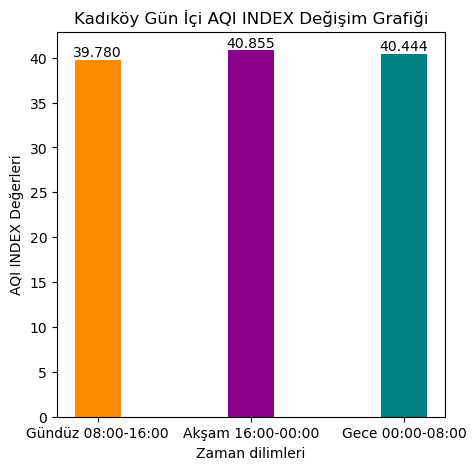

In [227]:
plot_günici_hesap(dfs["Kadıköy"],'Kadıköy')

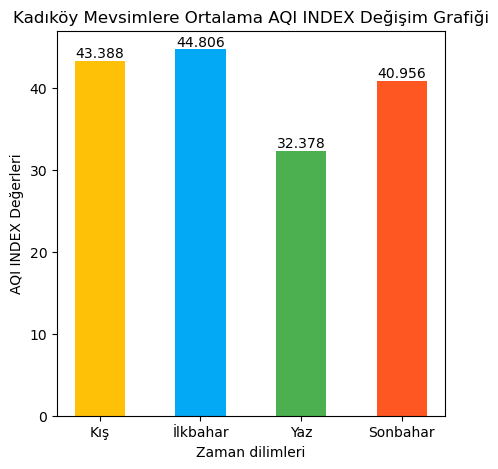

In [228]:
plot_mevsim_hesap(dfs["Kadıköy"],'Kadıköy')

 eski bir yerleşim yeri olması sebebiyle  bazı bölgelerde ..... yakıt kullanımına uygun altyapı yoktur bu sebeple kış aylarında yükselen hava kirliliği değerleri gözlemlenmektedir. mevsimsel ortalama grafiğe baktığımızda yaz aylarında yaklaşık %25 lik bir düşüş görmekteyiz nufüsun yoğun olduğu bölgede yaşanan bu dalgalanmanın sebepleri detaylıca incelenmeli, kış ve bahar aylarında hava kirliliğin artış sebepleri analiz edilip önlemler arttırılmalıdır 
 

## Kandilli


İstanbul'un Üsküdar ilçesine bağlı bir semttir. Kandilli, İstanbul'un diğer bölgelerine göre daha temiz bir hava kalitesine sahiptir. Semt, yeşil alanlarla çevrili olması ve deniz kenarında bulunması sebebiyle daha ferah bir atmosfere sahiptir. Ayrıca Kandilli, sakin bir yaşam tarzının tercih edildiği bir semt olduğundan, trafiğin yoğun olmadığı ve hava kirliliğinin daha az olduğu bir bölgedir. [yıllara göre grafik] 2019 ve 2021 yıllarında oldukça yükselen ortalama aqı değerlerine rağmen ölçüm istasyonunun verileri istanbul ortalamasının oldukça altında değerler kaydetmiştir.

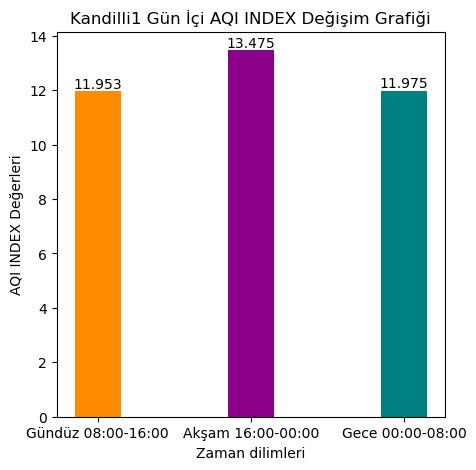

In [232]:
plot_günici_hesap(dfs["Kandilli1"],'Kandilli1')

gün içinde ve gece saaylerişnde yakın düzeyde seyreden ortalama aqı değeri verileri akşam saatlerinde %10 ya yakın yükseliş gösterebilmektedir. 

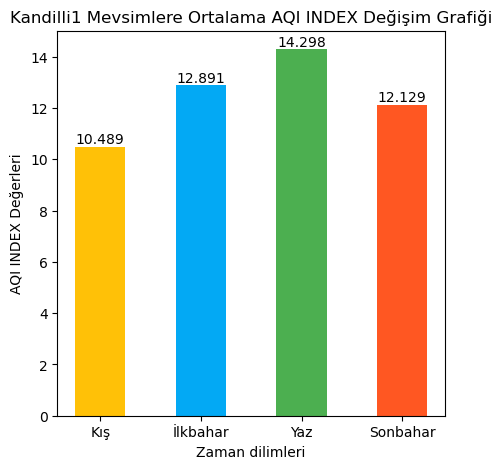

In [230]:
plot_mevsim_hesap(dfs["Kandilli1"],'Kandilli1')

## Kartal

İstanbul'un Anadolu Yakası'nda yer alan ve hızla gelişen bir ilçedir. İlçenin yüzölçümü 38,54 kilometrekare olup, İstanbul'un nüfus yoğunluğuna sahip bölgelerinden biridir. İstanbul Boğazı'nın Marmara Denizi'ne yakın bir noktasında konumlanmıştır. Bu konumu, ticari ve deniz ulaşımı açısından stratejik bir avantaj sağlamaktadır. Kartali sanayi açısından da önemli bir merkezdir. İlçede birçok sanayi bölgesi, fabrika ve işletme bulunmaktadır. Özellikle Kartal Organize Sanayi Bölgesi, birçok sektörde faaliyet gösteren işletmelerin buluşma noktasıdır.

ortalama aqı değerleri 2010 yıllarında oldukça yüksek seyretmiştir. ardından alınan önlemler sonucu yıllık ortalama düşmüş olsa da hala istanbul'un riskli bölgelernden biridir. 

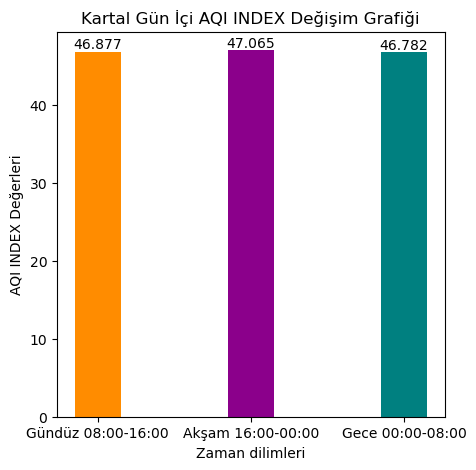

In [234]:
plot_günici_hesap(dfs["Kartal"],'Kartal')

gün içindeki zaman dilimlerinde ortalamalar birbirne oldukça yakındır. bu veri ilçede havayı kirleten etmenlerin değişken trafik veya turistik faaliyetlerden ziyade sürekli devam eden sanayi üretiminden kaynaklandığını düşündürmektedir.

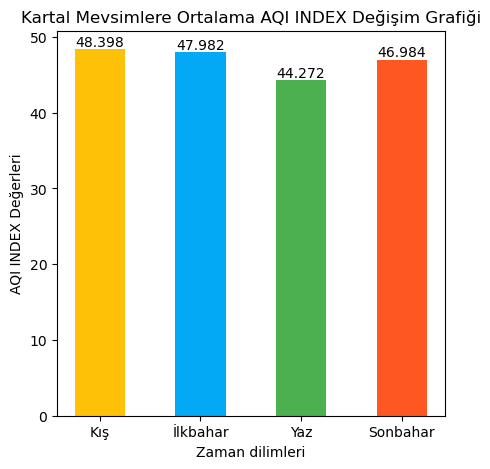

In [235]:
plot_mevsim_hesap(dfs["Kartal"],'Kartal')

yaz aylarında düşüş gerçekleşse de istanbul için acilen tedbir alınması gereken ve ortalama hava kirliliğinin azaltılması gereken ilçelerden biridir. 

## Kağıthane

Kağıthane, İstanbul'un Avrupa Yakası'nda bulunan ve hızla gelişen bir ilçedir. Yaklaşık 14,9 kilometrekarelik bir yüzölçümüne sahip olan Kağıthane, İstanbul'un nüfus yoğunluğu açısından önemli bölgelerinden biridir.Coğrafi olarak, Kağıthane, İstanbul'un merkezi bir konumunda yer alır. Batısında Sarıyer, doğusunda Şişli, güneyinde Beşiktaş ve Beyoğlu ilçeleri ile komşudur.Sanayi açısından, Kağıthane birçok işletme, fabrika ve sanayi alanına ev sahipliği yapmaktadır. Özellikle tekstil, metal ve kimya gibi sektörlerde faaliyet gösteren birçok işletme bulunmaktadır.ğun nüfus, trafik ve sanayi faaliyetleri, hava kalitesini olumsuz etkileyen faktörler arasındadır.

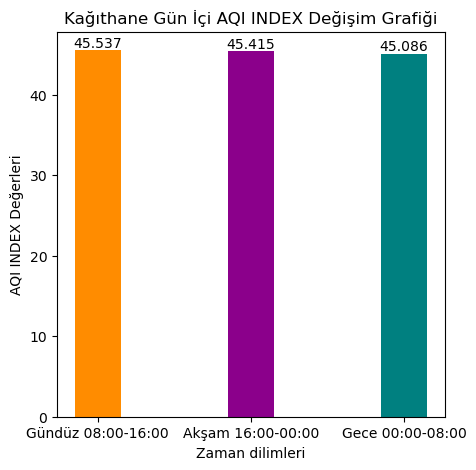

In [237]:
plot_günici_hesap(dfs["Kağıthane1"],'Kağıthane')

burada gün içinde fazla dalganlama gözlemlenmiyor. 

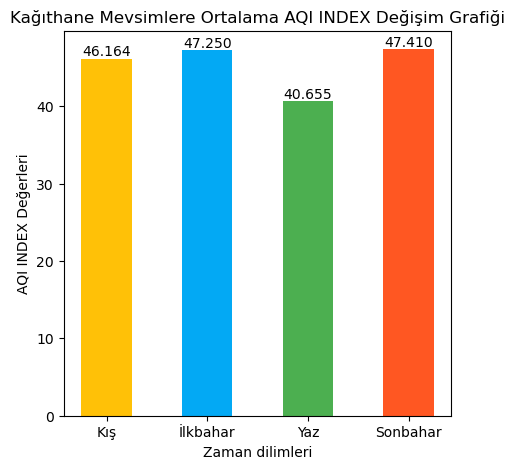

In [238]:
plot_mevsim_hesap(dfs["Kağıthane1"],'Kağıthane')

## Kumköy

In [239]:
#ölçüm istasyonu görseli eklenebilir. 


Kilyos, İstanbul'un Sarıyer ilçesine bağlı bir sahil semtidir. Genellikle yaz aylarında yerli ve yabancı turistlerin tercih ettiği bir destinasyondur. Kumköy olarak da bilinen Kilyos, Karadeniz Denizi kıyısında yer alır ve güzel plajlarıyla ünlüdür. 2016 yılından bu yana hava kalitesi verisi kaydedilmektedir. Hava kirliliği açısından, Kilyos daha az sanayileşmiş ve kalabalık olmayan bir bölge olduğu için genellikle İstanbul şehir merkezine göre daha temiz bir hava kalitesine sahiptir. Ancak, yaz aylarında yoğunlaşan turist akını ve artan araç trafiği hava kalitesini oldukça etkileyen bir etmendir 


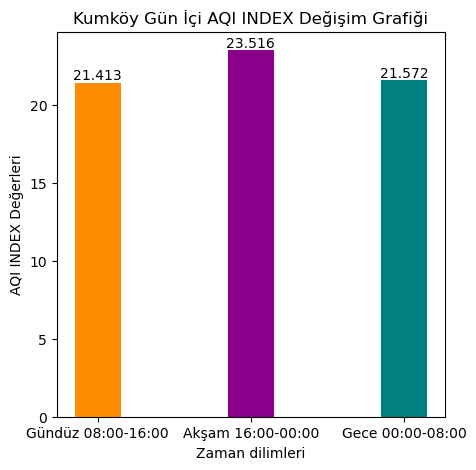

In [240]:
plot_günici_hesap(dfs["Kumköy"],'Kumköy')

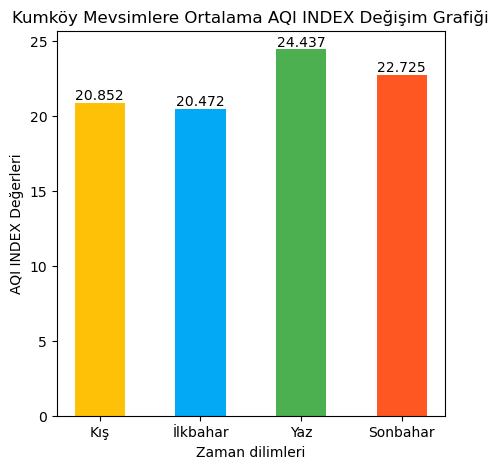

In [241]:
plot_mevsim_hesap(dfs["Kumköy"],'Kumköy')

grafikte turizm etkisini görebilmekteyiz

## Maslak


Maslak, İstanbul'un Sarıyer ilçesine bağlı bir semttir ve şehrin finans, iş ve teknoloji merkezlerinden biridir. Yüksek binaları, modern iş merkezleri ve yoğun iş faaliyetleri ile tanınır.

Maslak, İstanbul'un yüzölçümü bakımından küçük bir bölge olmasına rağmen, finans ve iş dünyasının kalbi olarak önemli bir rol oynamaktadır.


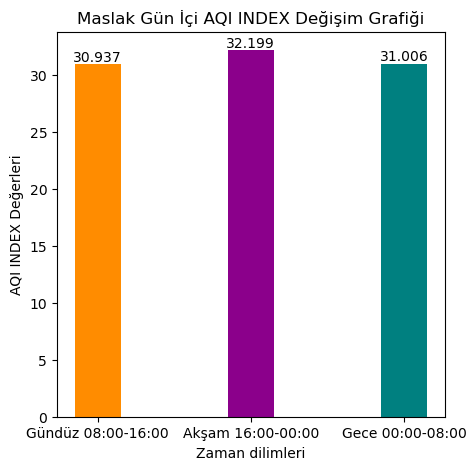

In [242]:
plot_günici_hesap(dfs["Maslak"],'Maslak')

trafiğin etkisini grafikten görebilmeteyiz

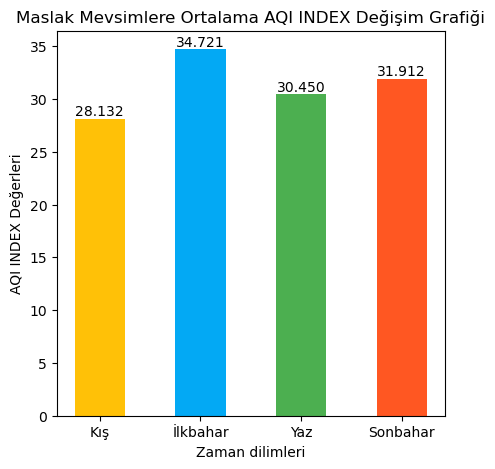

In [ ]:
plot_mevsim_hesap(dfs["Maslak"],'Maslak')

## Sancaktepe

Sancaktepe, İstanbul'un Anadolu Yakası'nda yer alan ve şehrin doğu kesiminde bulunan bir ilçedir. Geniş bir yüzölçümüne sahiptir. ilçe ormanlık alanlara ve doğal güzelliklere de sahiptir.

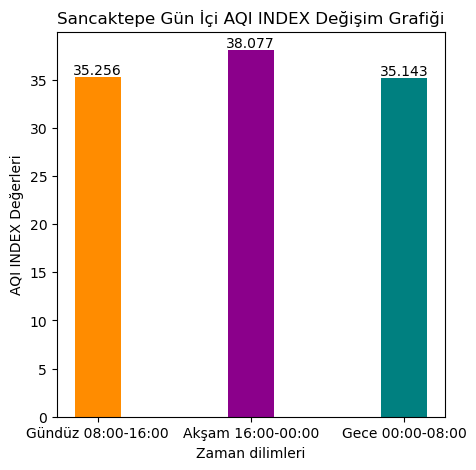

In [245]:
plot_günici_hesap(dfs["Sancaktepe"],'Sancaktepe')

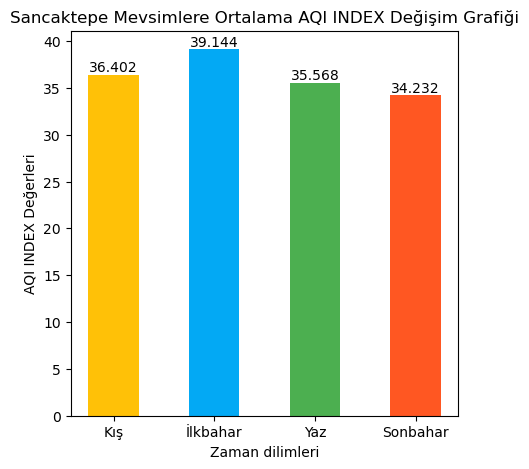

In [246]:
plot_mevsim_hesap(dfs["Sancaktepe"],'Sancaktepe')